<a href="https://colab.research.google.com/github/pk1510/CGAN/blob/main/htc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install mmcv-full
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .
!pip install Pillow==7.0.0


Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.5.1+cu101 in /usr/local/lib/python3.6/dist-packages (1.5.1+cu101)
Requirement already up-to-date: torchvision==0.6.1+cu101 in /usr/local/lib/python3.6/dist-packages (0.6.1+cu101)
Cloning into 'mmdetection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14942 (delta 3), reused 0 (delta 0), pack-reused 14932
Receiving objects: 100% (14942/14942), 16.59 MiB | 31.82 MiB/s, done.
Resolving deltas: 100% (10228/10228), done.
/content/mmdetection/mmdetection
Obtaining file:///content/mmdetection/mmdetection
  Found existing installation: mmdet 2.8.0
    Can't uninstall 'mmdet'. No files were found to uninstall.
  Running setup.py develop for mmdet


In [4]:
#!rm -rf checkpoints
!mkdir checkpoints
!wget -c http://download.openmmlab.com/mmdetection/v2.0/htc/htc_r50_fpn_1x_coco/htc_r50_fpn_1x_coco_20200317-7332cf16.pth \
      -P checkpoints
!ls checkpoints

--2021-01-09 06:55:04--  http://download.openmmlab.com/mmdetection/v2.0/htc/htc_r50_fpn_1x_coco/htc_r50_fpn_1x_coco_20200317-7332cf16.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321325972 (306M) [application/octet-stream]
Saving to: ‘checkpoints/htc_r50_fpn_1x_coco_20200317-7332cf16.pth’

htc_r50_fpn_1x_coco 100%[===================>] 306.44M  8.50MB/s    in 37s     

2021-01-09 06:55:46 (8.27 MB/s) - ‘checkpoints/htc_r50_fpn_1x_coco_20200317-7332cf16.pth’ saved [321325972/321325972]

htc_r50_fpn_1x_coco_20200317-7332cf16.pth


In [5]:
!apt-get -q install tree
#!tree /content/drive/MyDrive/wheat-coco
!tree /content/drive/MyDrive/wheat-coco/archive/coco

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/content/drive/MyDrive/wheat-coco/archive/coco
├── annotations
│   ├── instances_train2017.json
│   └── instances_val2017.json
├── train2017
│   ├── 00333207f.jpg
│   ├── 005b0d8bb.jpg
│   ├── 006a994f7.jpg
│   ├── 00764ad5d.jpg
│   ├── 00b5fefed.jpg
│   ├── 00b70a919.jpg
│   ├── 00e903abe.jpg
│   ├── 00ea5e5ee.jpg
│   ├── 010b216d4.jpg
│   ├── 010c93b99.jpg
│   ├── 010dbcc8f.jpg
│   ├── 0114c88aa.jpg
│   ├── 01189a3c3.jpg
│   ├── 0126b7d11.jpg
│   ├── 013669953.jpg
│   ├── 01397a84c.jpg
│   ├── 013fd7d80.jpg
│   ├── 019d1c76a.jpg
│   ├── 01e2c61d9.jpg
│   ├── 01f37f1d3.jpg
│   ├── 025ea7326.jpg
│   ├── 02640d9da.jpg
│   ├── 027086635.jpg
│   ├── 02992044c.jpg
│   ├── 029c79463.jpg
│   ├── 029e03e52.jpg
│   ├── 02b6f199c.jpg
│   ├── 02e02e347.jpg
│   ├── 02f0fe2ca.jpg
│   ├── 02fe8c28e.jpg
│   ├──

In [14]:
#from mmdet.datasets.my_dataset import MyDataset
!pwd
import mmcv
from mmcv import Config
from mmdet.apis import set_random_seed
cfg=Config.fromfile(r"configs/htc/htc_without_semantic_r50_fpn_1x_coco.py")
for i in range(len(cfg.model.roi_head.bbox_head)):
  cfg.model.roi_head.bbox_head[i].num_classes=1
  cfg.model.roi_head.mask_head[i].num_classes=1
cfg.load_from=r"checkpoints/htc_r50_fpn_1x_coco_20200317-7332cf16.pth"

data_root=r"/content/drive/MyDrive/wheat-coco/archive/coco/"
cfg.data.train.data_root=data_root
cfg.data.train.classes=('wheat',)
cfg.data.train.ann_file=data_root + r"annotations/instances_train2017.json"
cfg.data.train.img_prefix=data_root + r"train2017/"

cfg.data.val.data_root=data_root
cfg.data.val.classes=('wheat',)
cfg.data.val.ann_file=data_root + r"annotations/instances_val2017.json"
cfg.data.val.img_prefix=data_root + r"val2017/"

cfg.data.test.data_root=data_root
cfg.data.test.classes=('wheat',)
cfg.data.test.ann_file=data_root + r"annotations/instances_val2017.json"
cfg.data.test.img_prefix=data_root + r"val2017/"

cfg.work_dir = r"/content/drive/MyDrive/wheat-coco/htc_r50fpn_withoutSemantic_work_dir"
cfg.optimizer.lr = 0.02/8                                # Since we are using a single GPU only.
cfg.lr_config.warmup = None
cfg.log_config.interval = 5
cfg.total_epochs = 12
cfg.evaluation.interval = 5
cfg.checkpoint_config.interval = 5
cfg.seed = 0
cfg.gpu_ids = range(1)
model.CLASSES=datasets[0].CLASSES
set_random_seed(0, deterministic=False)


/content/mmdetection/mmdetection


In [7]:
import os
import os.path as osp
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import inference_detector, init_detector, show_result_pyplot, train_detector
print(cfg.dataset_type)
datasets=[build_dataset(cfg.data.train)]
model=build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
print(datasets[0].CLASSES)
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

CocoDataset
loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


2021-01-09 06:55:52,619 - mmdet - INFO - load model from: torchvision://resnet50
2021-01-09 06:55:52,854 - mmdet - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias



('wheat',)
loading annotations into memory...


2021-01-09 06:55:57,437 - mmdet - INFO - load checkpoint from checkpoints/htc_r50_fpn_1x_coco_20200317-7332cf16.pth


Done (t=0.26s)
creating index...
index created!


2021-01-09 06:55:57,664 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.0.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.0.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.1.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.1.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.2.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.2.fc_cls.bias: copying 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 338/338, 1.1 task/s, elapsed: 310s, ETA:     0s

2021-01-09 08:09:32,366 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.12s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=37.38s).
Accumulating evaluation results...


2021-01-09 08:10:10,643 - mmdet - INFO - Evaluating segm...


DONE (t=0.76s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.492
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.490
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.090
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.483
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.538
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.183
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.549
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.604
Loading and preparing resul

2021-01-09 08:10:49,231 - mmdet - INFO - Epoch(val) [5][479]	bbox_mAP: 0.4920, bbox_mAP_50: 0.8950, bbox_mAP_75: 0.4900, bbox_mAP_s: 0.0900, bbox_mAP_m: 0.4830, bbox_mAP_l: 0.5380, bbox_mAP_copypaste: 0.492 0.895 0.490 0.090 0.483 0.538, segm_mAP: 0.4900, segm_mAP_50: 0.8960, segm_mAP_75: 0.4800, segm_mAP_s: 0.0930, segm_mAP_m: 0.4820, segm_mAP_l: 0.5320, segm_mAP_copypaste: 0.490 0.896 0.480 0.093 0.482 0.532


DONE (t=0.75s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.490
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.896
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.480
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.093
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.482
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.532
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.558
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.192
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.551
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.598


2021-01-09 08:11:01,540 - mmdet - INFO - Epoch [6][5/479]	lr: 2.500e-03, eta: 1:34:52, time: 2.445, data_time: 0.771, memory: 5198, loss_rpn_cls: 0.0259, loss_rpn_bbox: 0.0575, s0.loss_cls: 0.1801, s0.acc: 91.8359, s0.loss_bbox: 0.1757, s0.loss_mask: 0.2591, s1.loss_cls: 0.0909, s1.acc: 92.4886, s1.loss_bbox: 0.2424, s1.loss_mask: 0.1215, s2.loss_cls: 0.0565, s2.acc: 90.0071, s2.loss_bbox: 0.1378, s2.loss_mask: 0.0479, loss: 1.3953
2021-01-09 08:11:10,498 - mmdet - INFO - Epoch [6][10/479]	lr: 2.500e-03, eta: 1:34:44, time: 1.792, data_time: 0.149, memory: 5198, loss_rpn_cls: 0.0240, loss_rpn_bbox: 0.0569, s0.loss_cls: 0.1843, s0.acc: 91.6211, s0.loss_bbox: 0.1736, s0.loss_mask: 0.2408, s1.loss_cls: 0.0887, s1.acc: 92.2318, s1.loss_bbox: 0.2377, s1.loss_mask: 0.1069, s2.loss_cls: 0.0560, s2.acc: 89.7386, s2.loss_bbox: 0.1440, s2.loss_mask: 0.0445, loss: 1.3573
2021-01-09 08:11:19,529 - mmdet - INFO - Epoch [6][15/479]	lr: 2.500e-03, eta: 1:34:36, time: 1.807, data_time: 0.168, memory: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 338/338, 1.6 task/s, elapsed: 214s, ETA:     0s

2021-01-09 09:23:31,307 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.12s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=36.26s).
Accumulating evaluation results...


2021-01-09 09:24:08,447 - mmdet - INFO - Evaluating segm...


DONE (t=0.74s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.906
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.505
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.101
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.496
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.545
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.568
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.568
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.568
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.226
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.562
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.603
Loading and preparing resul

2021-01-09 09:24:46,577 - mmdet - INFO - Epoch(val) [10][479]	bbox_mAP: 0.5030, bbox_mAP_50: 0.9060, bbox_mAP_75: 0.5050, bbox_mAP_s: 0.1010, bbox_mAP_m: 0.4960, bbox_mAP_l: 0.5450, bbox_mAP_copypaste: 0.503 0.906 0.505 0.101 0.496 0.545, segm_mAP: 0.4960, segm_mAP_50: 0.9060, segm_mAP_75: 0.4840, segm_mAP_s: 0.1080, segm_mAP_m: 0.4910, segm_mAP_l: 0.5300, segm_mAP_copypaste: 0.496 0.906 0.484 0.108 0.491 0.530


DONE (t=0.75s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.496
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.906
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.484
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.108
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.491
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.530
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.563
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.563
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.563
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.242
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.560
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.588


2021-01-09 09:24:58,877 - mmdet - INFO - Epoch [11][5/479]	lr: 2.500e-04, eta: 0:27:08, time: 2.444, data_time: 0.869, memory: 5198, loss_rpn_cls: 0.0158, loss_rpn_bbox: 0.0496, s0.loss_cls: 0.1746, s0.acc: 92.0898, s0.loss_bbox: 0.1727, s0.loss_mask: 0.2456, s1.loss_cls: 0.0767, s1.acc: 93.6374, s1.loss_bbox: 0.2257, s1.loss_mask: 0.1125, s2.loss_cls: 0.0511, s2.acc: 91.1364, s2.loss_bbox: 0.1353, s2.loss_mask: 0.0435, loss: 1.3032
2021-01-09 09:25:07,627 - mmdet - INFO - Epoch [11][10/479]	lr: 2.500e-04, eta: 0:26:59, time: 1.751, data_time: 0.155, memory: 5198, loss_rpn_cls: 0.0245, loss_rpn_bbox: 0.0485, s0.loss_cls: 0.1650, s0.acc: 92.9102, s0.loss_bbox: 0.1502, s0.loss_mask: 0.2522, s1.loss_cls: 0.0783, s1.acc: 93.3660, s1.loss_bbox: 0.2090, s1.loss_mask: 0.1108, s2.loss_cls: 0.0498, s2.acc: 90.2563, s2.loss_bbox: 0.1294, s2.loss_mask: 0.0441, loss: 1.2618
2021-01-09 09:25:16,716 - mmdet - INFO - Epoch [11][15/479]	lr: 2.500e-04, eta: 0:26:51, time: 1.817, data_time: 0.175, memor

5e7aab7a2.jpg


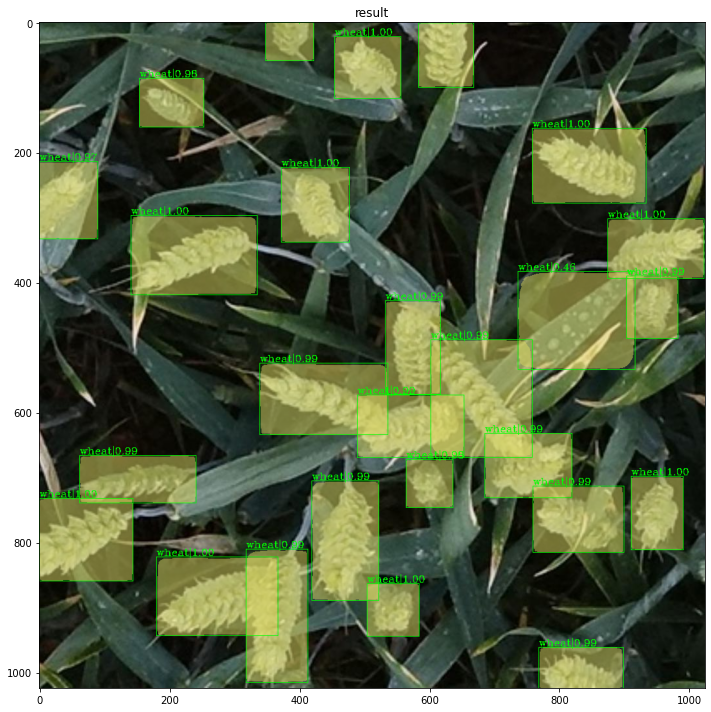

cb256df87.jpg


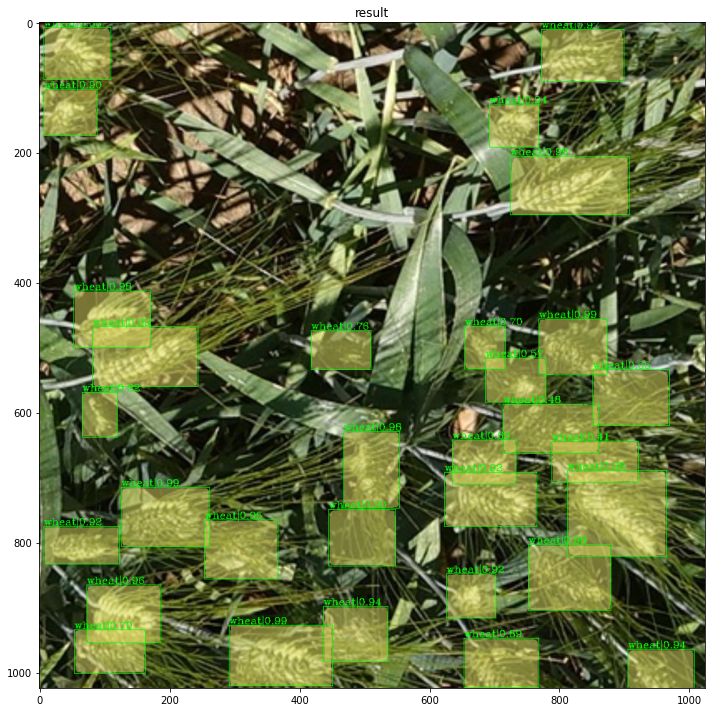

41457a646.jpg


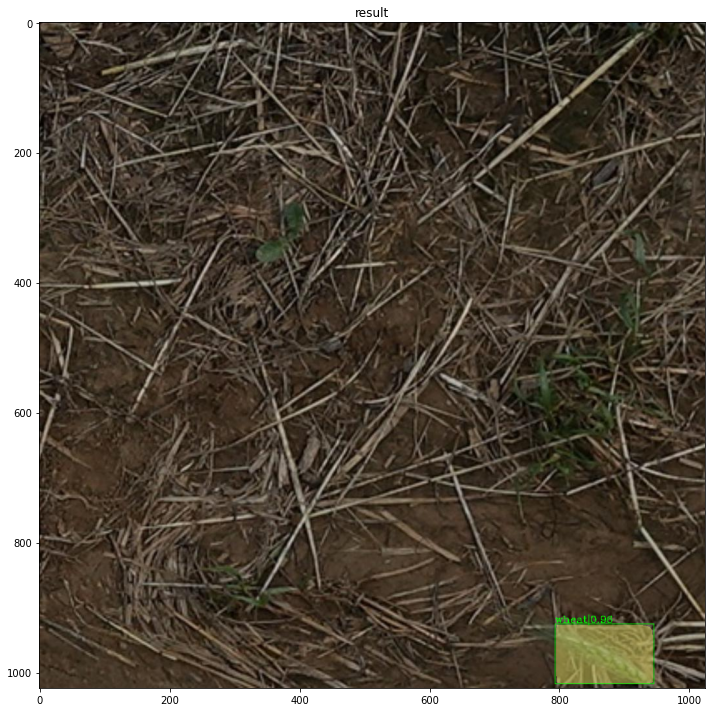

673b64e17.jpg


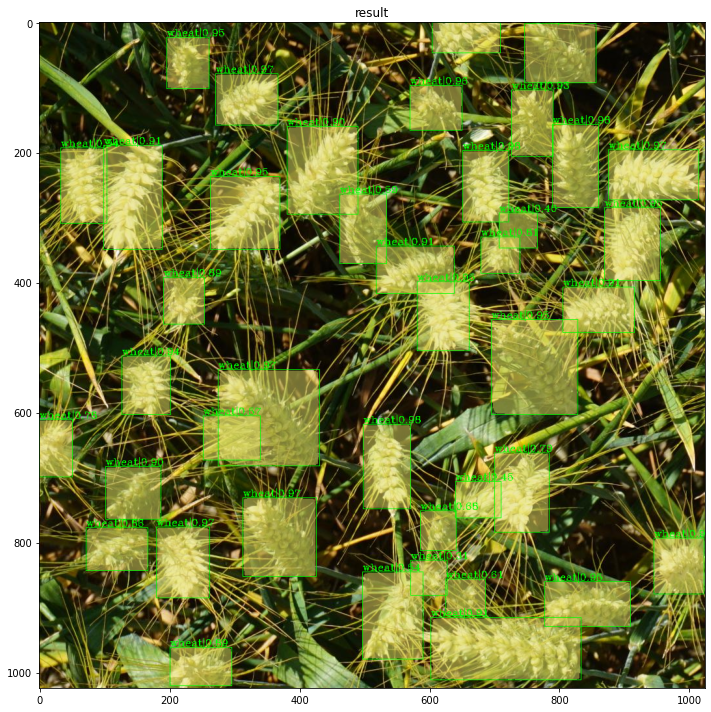

aec95891a.jpg


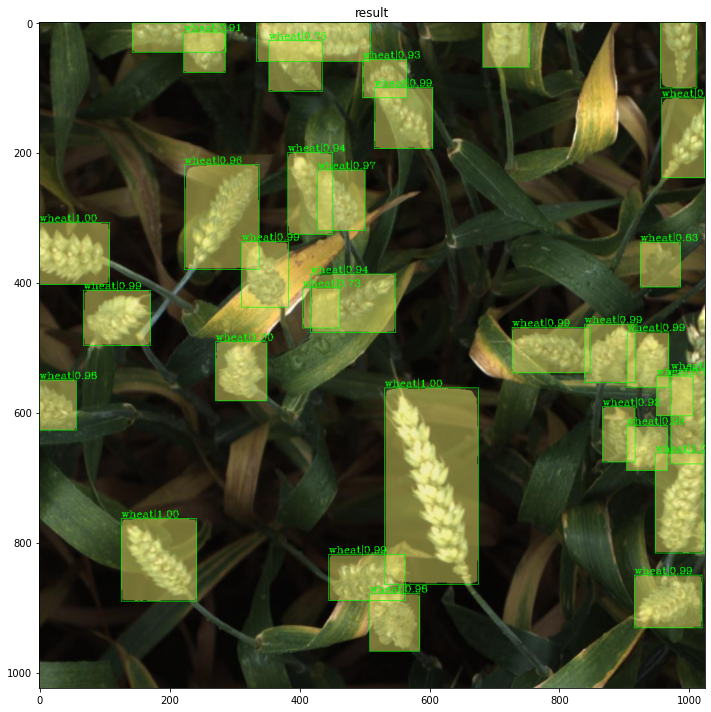

In [15]:
import random
model.cfg=cfg
folder=data_root+r"val2017/"
for img_file in random.sample(os.listdir(folder), 5):
  img=mmcv.imread(folder+img_file)
  outputs=inference_detector(model, img)
  print(img_file)
  show_result_pyplot(model, img, outputs)

In [ ]:
#!cp -r ./htc_r50fpn_withoutSemantic_work_dir /content/drive/MyDrive/wheat-coco

In [ ]:
print(cfg.model['backbone'])

In [ ]:
cfg.model=dict(pretrained='open-mmlab://resnest50')
cfg.model=dict(
    backbone=dict(
        type='ResNeSt',
        groups=8,
        stem_channels=64,
        depth=50,
        radix=2,
        reduction_factor=4,
        avg_down_stride=True,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg = dict(type='SyncBN', requires_grad=True),
        norm_eval=False,
        style='pytorch'))
cfg.work_dir=r"/content/drive/MyDrive/wheat-coco/htc_s50_work_dir"

In [ ]:
model=build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

In [ ]:
!cp -r ./htc_s50_work_dir /content/drive/MyDrive/wheat-coco

In [ ]:
model.cfg=cfg
for img_file in random.sample(os.listdir(folder, 5)):
  img=mmcv.imread(folder+img_file)
  outputs=inference_detector(model, img)
  print(img_file)
  show_result_pyplot(model, img, outputs)